<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import ndimage as ndi
from skimage.io import imread
from skimage.io import imshow
from skimage import data
from skimage.exposure import histogram
from skimage.color import rgb2grey
from skimage.filters import gaussian
from skimage.segmentation import active_contour

import matplotlib.pyplot as plt

from google.colab import drive

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8398562924626816133
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11321147392
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17898541821398902203
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

In [ ]:
drive.mount('/content/drive')

MessageError: ignored

## Read Images

In [ ]:
PATH = '/content/drive/My Drive/National-Gallery.jpg' #@param{type:"string"}
img = imread(PATH)
img2 = rgb2grey(imread(PATH))
w, d = img2.shape
imshow(img)

## Scale Images

Matrices for affine transformation operations:

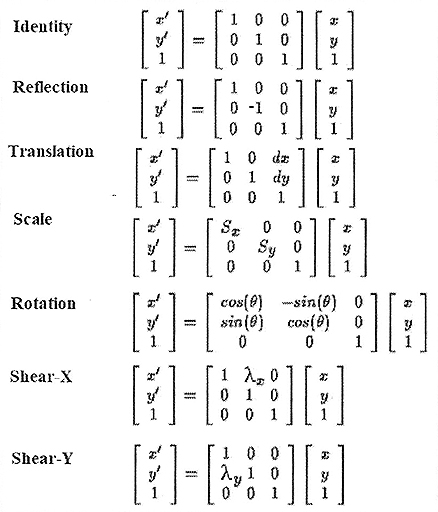

In [ ]:
scale_x = 1.5 #@param{type:"slider", min:0, max:4, step:0.25} 
scale_y = 1.5 #@param{type:"slider", min:0, max:4, step:0.25} 
img_scale = np.array([[scale_x, 0 ,0], [0, scale_y, 0], [0, 0, 1]])
img_scaled = ndi.affine_transform(img, img_scale)
imshow(img_scaled)

## Subplots

In [ ]:
img_scale = np.array([[scale_x, 0 ,0], [0, scale_y, 0], [0, 0, 1]])
img_scaled = ndi.affine_transform(img2, img_scale)

fig, (ax, ax2) = plt.subplots(1, 2) 
ax.imshow(img_scaled, cmap='binary')
ax2.imshow(img_scaled, cmap='viridis')

## Plot Histogram

In [ ]:
plt.hist(img2)

## Active Contour Model

In [ ]:
s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)

ax.plot(init[:, 1], init[:, 0], '-r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

## Canny Edge Detection

Canny(image, threshold1, threshold2)

In [ ]:
import cv2 as cv
threshold_1 = 323 #@param{type:"slider", min:0, max:512, step:1}
threshold_2 = 313 #@param{type:"slider", min:0, max:512, step:1}
edges = cv.Canny(img, threshold_1, threshold_2)

imshow(edges)

In [ ]:
PATH2 = '/content/drive/My Drive/portrait.png' #@param{type:"string"}
img3 = imread(PATH)
img4 = rgb2grey(imread(PATH))
w, d = img2.shape
imshow(img)

In [ ]:
from PIL import Image

img5 = img3.convert('L')  # convert image to 8-bit grayscale
WIDTH, HEIGHT = img5.size

data = list(img5.getdata()) # convert image data to a list of integers
# convert that to 2D list (list of lists of integers)
data = [data[offset:offset+WIDTH] for offset in range(0, WIDTH*HEIGHT, WIDTH)]

# At this point the image's pixels are all in memory and can be accessed
# individually using data[row][col].

# For example:
for row in data:
    print(' '.join('{:3}'.format(value) for value in row))

# Here's another more compact representation.
chars = '@%#*+=-:. '  # Change as desired.
scale = (len(chars)-1)/255.
print()
for row in data:
    print(' '.join(chars[int(value*scale)] for value in row))